<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(-1, 3)

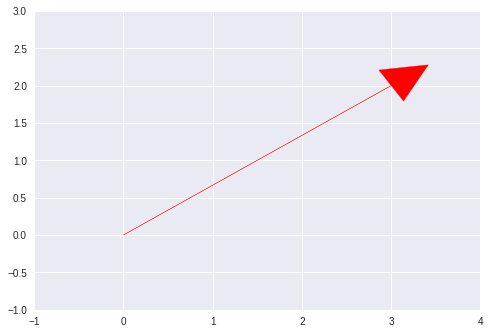

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA


plt.arrow(0,0, 3,2, head_width=0.5, head_length=0.5, color='r')
plt.xlim(-1,4)
plt.ylim(-1,3)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
from numpy import linalg as LA

b=[17,-4,-2,1]
LA.norm(b)

17.60681686165901

Norm of vector represents a positive length  vector in subspace.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c=[3,7,-2,12]
d=[9,-7,4,6]
np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [11]:

E=[
    [7,4,2],
    [1,3,-1],
    [2,6,-4]
]
E_inv=LA.inv(E)
E_transpose=np.transpose(E)
print('E inverse\n', E_inv)
print('\nE transpose\n', E_transpose)

E inverse
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

E transpose
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [12]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [13]:
##### Your Code Here #####
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


Customer mean = 1135.714; standard deviation=314.26
snow mean=2.714; standard deviation = 2.9277

In [15]:
np.var(df)

customers    84653.061224
snow             7.346939
dtype: float64

Customer variance= 84653
snow variance= 7.34

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Not comparable. They are not standardized.  They need to convert to z-score in order to compare. Substract by the mean and divide by standard deviation.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [17]:
np.cov(df.customers, df.snow)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [31]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [32]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

In [33]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler
Xstd=StandardScaler().fit_transform(X)
Xstd

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.10499766, -0.05191741, -0.01749546, -0.64432226,  0.65827466,
        -0.13830319, -0.63242919,  0.64458535,  0.73740709, -0.45007561,
         0.86331183, -0.25954622,  0.37773603, -0.33626508,  0.80547723,
        -0.43523112,  0.13055067],
       [ 0.84182336,  1.60943981, -1.27716878,  1.67946294,  0.53580495,
         0.96812236,  1.53589947,  1.15244047,  0.9292974 ,  0.43569619,
         1.09352832,  1.19885635,  1.40168163,  0.08406627,  1.17160324,
        -1.40423624,  1.54795798],
       [ 0.71656299, -0.46725672, -0.22744102, -0.85557546,  0.53580495,
         0.74683725, -1.09707105, -0.33205912, -0.0575671 , -1.33584741,
        -0.70983418,  0.54381113, -0.49636387,  1.51319287, -0.87870243,
         1.19072664, -0.54085279],
       [-1.66338402, -1.09026568,  1.52210526, -0.17956522, -1.72988456,
        -1.57665641,  0.19360077, -1.4649667 , -1.60913739,  1.35022682,
        -1.24700598, -1.48312126, -1.28305378, -1.26099406, -1.09837804,
         0.64874072

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [34]:
##### Your Code Here #####
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(Xstd)
print('\n Eigenvectors : \n', pca.components_)
print('\n Eigenvalues :\n', pca.explained_variance_)
print('\n Percentage of variance by each principal component :\n', 
      ['{:.1%}'.format(x) for x in pca.explained_variance_ratio_ ])



 Eigenvectors : 
 [[-0.25509484 -0.27747513  0.28562914 -0.17843996 -0.24572131 -0.25275834
  -0.12719487 -0.28611787 -0.27890521  0.09775901 -0.26544997 -0.26481055
  -0.28708628 -0.12073819 -0.25767815  0.22771961 -0.2811012 ]
 [ 0.23231808 -0.13773847 -0.07716993 -0.32902948  0.24708041  0.21105701
  -0.40054501 -0.01100602  0.08174644 -0.45468785 -0.0964863   0.13610704
  -0.09282322  0.41036129 -0.1539603   0.29323981 -0.13684092]
 [-0.11736728 -0.14839777  0.15327713 -0.38616448  0.18723888 -0.24529742
  -0.34010234  0.20499304  0.2428402  -0.11338943  0.35064519 -0.30439545
   0.07333507 -0.32037834  0.33340494 -0.17168328 -0.05073161]
 [ 0.80625169  0.19387066 -0.14632526  0.01866588 -0.13010352 -0.33756965
  -0.23217519 -0.07411736 -0.07485098  0.18690625 -0.04468974 -0.1383045
  -0.02340534 -0.1827877  -0.00624012  0.06742816 -0.01128752]]

 Eigenvalues :
 [1.54876508e+01 5.63749203e+00 1.54152380e+00 2.97764819e-31]

 Percentage of variance by each principal component :
 ['

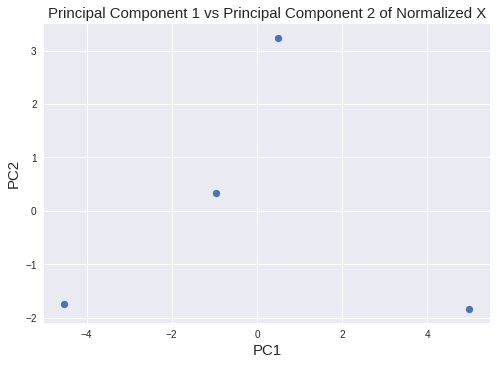

In [35]:
Xpca = pd.DataFrame(pca.transform(Xstd),
             columns=['PC1','PC2','PC3','PC4'])

fig, ax = plt.subplots()
ax.scatter(Xpca['PC1'], Xpca['PC2'])
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Principal Component 1 vs Principal Component 2 of Normalized X',
         fontsize=15)
plt.show()


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [37]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

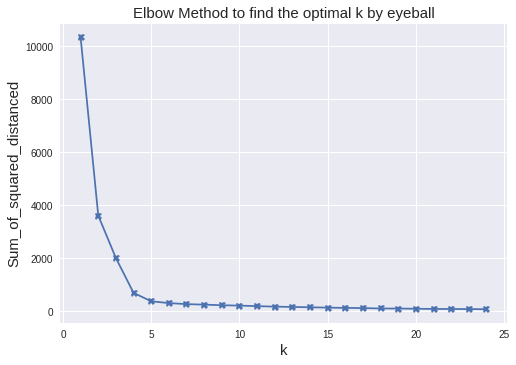

In [39]:
##### Your Code Here #####
from sklearn.cluster import KMeans

sum_of_squared_distanced = []
  
K = range(1,25)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(points)
  sum_of_squared_distanced.append(km.inertia_)

plt.plot(K, sum_of_squared_distanced, marker="X")
plt.xlabel('k', fontsize=15)
plt.ylabel('Sum_of_squared_distanced', fontsize=15)
plt.title('Elbow Method to find the optimal k by eyeball', fontsize=15)
plt.show()

Good elbow kink at k=4

In [41]:
km = KMeans(n_clusters=4)
km = km.fit(points)

print(km.cluster_centers_)

[[ 6.24979318  3.84457183]
 [-8.36652987 -3.61238083]
 [-3.59740679  4.13344099]
 [-2.73359305 -8.20435304]]


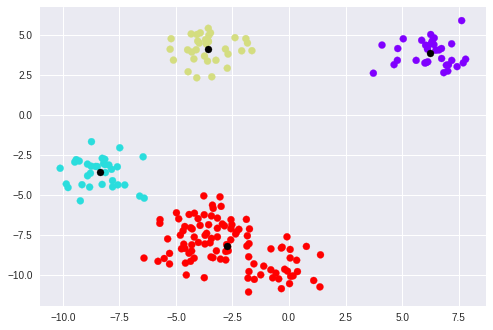

In [44]:

plt.scatter(points.x, points.y, c=km.labels_, cmap='rainbow')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')

In [47]:
t=km.transform(points)
t.shape

(200, 4)

In [48]:
points.shape

(200, 2)